In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# Topic: 1. Data preprocessing(dealing with missing data) 2.Multivariate linear regression

In [3]:
file_path = r"C:\Users\LENOVO YOGA X380\Desktop\ML\hiring.csv"
data = pd.read_csv(file_path)
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [7]:
# replace missing values
median_test_score = data['test_score(out of 10)'].median()
import math
median_floor = math.floor(median_test_score)
data['test_score(out of 10)']= data['test_score(out of 10)'].fillna(median_floor)
data


,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [12]:
# convert categorical data to numerical data
from word2number import w2n
data['experience'] = data['experience'].fillna('zero')
data.experience = data.experience.apply(w2n.word_to_num)
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [13]:
model = LinearRegression()
model.fit(data[['experience','test_score(out of 10)','interview_score(out of 10)']],data['salary($)'])
print(model.coef_)
print(model.intercept_)

[2812.95487627 1845.70596798 2205.24017467]
17737.263464337688


Text(0, 0.5, 'Salary($)')

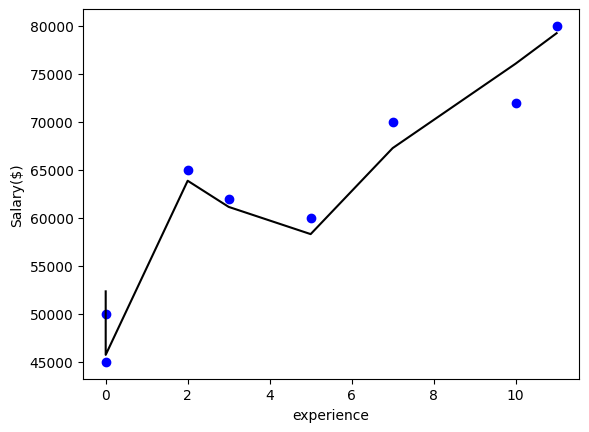

In [27]:
# 1. Create a sorted version of your data for plotting
%matplotlib inline
data_sorted = data.sort_values('experience')

# 2. Plot actual data points
plt.scatter(data.experience, data['salary($)'], color='blue', marker='o')

# 3. Plot the prediction line using the SORTED data
predictions = model.predict(data_sorted[['experience','test_score(out of 10)','interview_score(out of 10)']])
plt.plot(data_sorted.experience, predictions, color='black')

plt.xlabel('experience')
plt.ylabel('Salary($)')


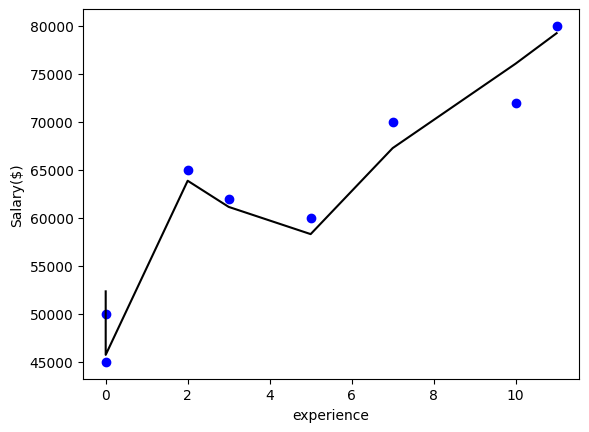

In [34]:
# visualize
%matplotlib inline
data_sorted = data.sort_values('experience')
plt.scatter(data['experience'],data['salary($)'],color='blue',marker='o')
plt.xlabel('experience')
plt.ylabel('Salary($)')
plt.plot(data_sorted['experience'],model.predict(data_sorted[['experience','test_score(out of 10)','interview_score(out of 10)']]),color='black')



In [36]:
# predict salary
print(model.predict([[2,9,6]]))
print(model.predict([[12,10,10]]))

[53205.96797671]
[92002.18340611]


c:\Users\LENOVO YOGA X380\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\LENOVO YOGA X380\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
